## Artificial Neural Networks

### Perceptron

This image is a TLU: Threshold logic unit

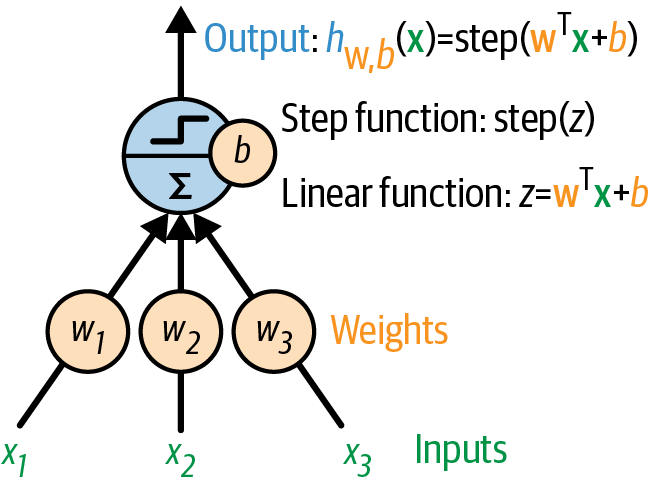

The step function is usually something like:

- 0 if x<0, 1 else (heaviside function)
- -1 if x<0, 0 if x=0, 1 else (sign function)

1 TLU can be used to do simple linear binary classification. 

A perceptron is made up of multiple TLU's organized as input > tlu layer > outputs

Dense/fully connected layer: every TLU connected to every input

Inputs > 3 TLUs > can be turned into a multilabel classifier

Computing the outputs of a fully connected layer:

$\hat Y = \phi (XW+b)$

- b is added row by row

Y hat is the output matrix, with one row per instance and one col per neuron. X is the input matrix. W is the weight matrix with one row per input and one col per neuron. b has the bias terms for each neuron.

**Perceptron weight updates:**

$w_{i,j} = w_{i,j} + \eta(y_j-\hat y_j)x_i$

- $w_{i,j}$ is the connection weight between input i and neuron j
- $\eta$ is the learning rate

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = (iris.target==0)
percep = Perceptron(random_state=42)
percep.fit(X,y)
percep.predict([[2,0.5], [3,1]])

c:\Users\willh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([ True, False])

## Multilayer Perception (MLP) and Backpropagation

An MLP is one input layer, 1+ layers of neurons, and one output layer.

Backpropagation is how we efficiently update the MLP's weights.

Steps:
1) Give the neural network training data (go through the network)
2) Go backwards, calculating gradients wrt each parameter (weight and bias) at each node

Hidden layer h = $\sigma (W_1 \cdot x)$

Output layer $\hat y$ = $\sigma (W_2 \cdot h)$

Loss L  = $(\hat y - y)^2$

- Important: save intermediate values of each layer for backpropagation

Backward pass:
1) Calculate output layer gradient $dL/dW_2 = dL/d\hat y \cdot d\hat y / dW_2$
2) Calculate hidden layer gradient $dL/dW_1 = dL/d\hat y \cdot d\hat y / dh \cdot dh/dW_1$
3) Update weights $W = W - \eta \cdot dL/dW$

More specifics on how backpropagation works:
- Goes thru mini batches, small subsets of the training data. Goes thru whole training set multiple times. Each pass through training set is 1 epoch.
- For each mini batch, algo computes output of hidden layer for each instance. So for batch size 32, and 50 neurons in the layer, makes a 32x50 matrix.
- Passes this matrix to the next layer, and then that layer computes the output, passes it on
- When the passing is done, measures loss with some error function (RMSE is common)
- Calculate how much each layer parameter contributed to error with the chain rule (see above)
- After each parameter in the network's contribution to error has been found, a gradient descent step is done to shift each parameter using the gradients found

It's important for the functions used to have gradients to work with or else this whole idea breaks down (step function doesn't work)

Common activation functions:
- Sigmoid function: $\sigma(z) = 1 / (1 + e^{-z})$. Output range is 0 to 1
- Hyperbolic tangent: $tanh(z) = 2\sigma(2z)-1$. Output range is -1 to 1
- RELU : max(0,z). Not differentiable at 0, but has a derivative of 0 for vals <0. Works well and is fast to compute.

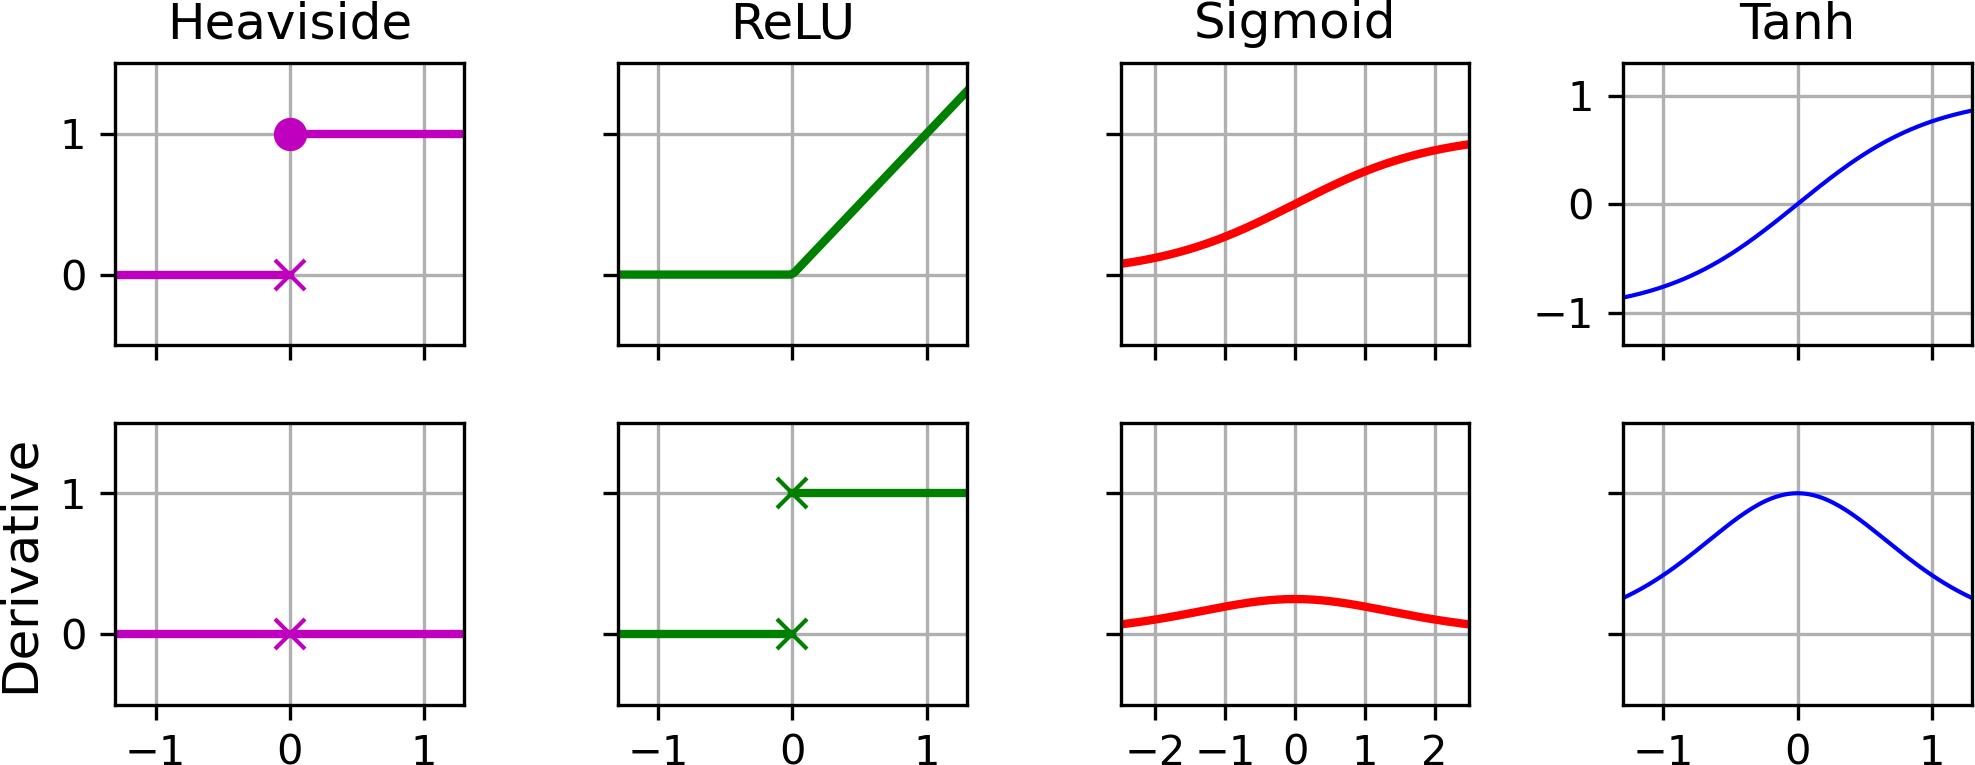

## MLPs in SKlearn

### Regression MLPs
- For single value regression, just need one output neuron
- To predict multiple values, just add more output neurons

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)

In [12]:
mlpReg = MLPRegressor(hidden_layer_sizes=[50,50,50], early_stopping=True, verbose=True, random_state=42)
# MLPRegressor will pick input and output layer sizes based on the data, targets you give it
# Setting early_stopping helps stop overfitting by keeping some training data for evaluation and stopping when validation score stops improving

In [14]:
pipeline = make_pipeline(StandardScaler(), mlpReg) # need to scale for gradient descent to work well
pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.85190332
Validation score: 0.534299
Iteration 2, loss = 0.28288639
Validation score: 0.651094
Iteration 3, loss = 0.22884372
Validation score: 0.699782
Iteration 4, loss = 0.20746145
Validation score: 0.720468
Iteration 5, loss = 0.19649383
Validation score: 0.724839
Iteration 6, loss = 0.18928708
Validation score: 0.740084
Iteration 7, loss = 0.18132029
Validation score: 0.747406
Iteration 8, loss = 0.17556450
Validation score: 0.753945
Iteration 9, loss = 0.17190651
Validation score: 0.760500
Iteration 10, loss = 0.16687650
Validation score: 0.759213
Iteration 11, loss = 0.16329479
Validation score: 0.761907
Iteration 12, loss = 0.16054473
Validation score: 0.768950
Iteration 13, loss = 0.15690181
Validation score: 0.762699
Iteration 14, loss = 0.15630644
Validation score: 0.766003
Iteration 15, loss = 0.15712517
Validation score: 0.778464
Iteration 16, loss = 0.15155981
Validation score: 0.774237
Iteration 17, loss = 0.14957641
Validation score: 0.778361
Iterat

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(early_stopping=True,
                              hidden_layer_sizes=[50, 50, 50], random_state=42,
                              verbose=True))])

In [17]:
mlpReg.best_validation_score_ # this is r^2

0.7915361254257781

In [19]:
y_pred = pipeline.predict(X_test)
root_mean_squared_error(y_test, y_pred)

0.5327699946812924

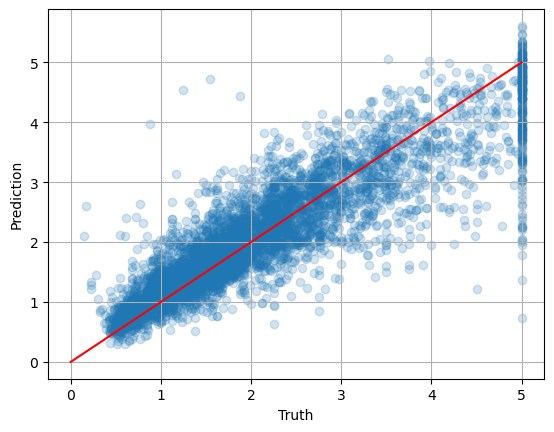

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([0,1,2,3,4,5], [0,1,2,3,4,5], color="red")
plt.grid()
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.show()

SKLearn doesn't support activation functions in the output layer, but you can use one.

Generally, MSE is best for regression, but if you have a lot of outliers it may be better to use MAE or Huber loss which mixes MAE and MSE.

For regression MLP tasks:
\begin{array}{|l|l|}
\hline
\textbf{Hyperparameter} & \textbf{Typical value} \\
\hline
\text{\# hidden layers} & \text{Depends on the problem, but typically 1 to 5} \\
\hline
\text{\# neurons per hidden layer} & \text{Depends on the problem, but typically 10 to 100} \\
\hline
\text{\# output neurons} & \text{1 per target dimension} \\
\hline
\text{Hidden activation} & \text{ReLU} \\
\hline
\text{Output activation} & \text{None, or ReLU/softplus (if positive outputs) or sigmoid/tanh (if bounded outputs)} \\
\hline
\text{Loss function} & \text{MSE, or Huber if outliers} \\
\hline
\end{array}

### Classification MLPs

Same general idea, but the output neuron gives you one number between 0-1 (for binary classification)

Adding more output neurons lets you multilabel inputs.

If each input can only take one class, you need one output neuron per class, and softmax the output layer.
$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

Softmaxxing the output layer makes the output layers activations sum to 1. The prediction is whichever neuron is the most confident.

THe loss function for classification tasks should be cross-entropy (see ch4).

\begin{array}{|l|l|l|l|}
\hline
\textbf{Hyperparameter} & \textbf{Binary classification} & \textbf{Multilabel binary classification} & \textbf{Multiclass classification} \\
\hline
\text{\# hidden layers} & \text{Typically 1 to 5 layers, depending on the task} & \text{Typically 1 to 5 layers, depending on the task} & \text{Typically 1 to 5 layers, depending on the task} \\
\hline
\text{\# output neurons} & 1 & \text{1 per binary label} & \text{1 per class} \\
\hline
\text{Output layer activation} & \text{Sigmoid} & \text{Sigmoid} & \text{Softmax} \\
\hline
\text{Loss function} & \text{X-entropy} & \text{X-entropy} & \text{X-entropy} \\
\hline
\end{array}

SKLearns MLPClassifier uses softmax and minimizes X-entropy. Score() returns accuracy %

Fashion mnist: mnist, but harder, since its fashion items instead of digits. Linear model does 83% on fashion vs 92% on digits.

Same format as digits (28x28)

In [28]:
from sklearn.datasets import fetch_openml
fashion = fetch_openml("Fashion-MNIST", as_frame=False)
targets = fashion.target.astype(int)

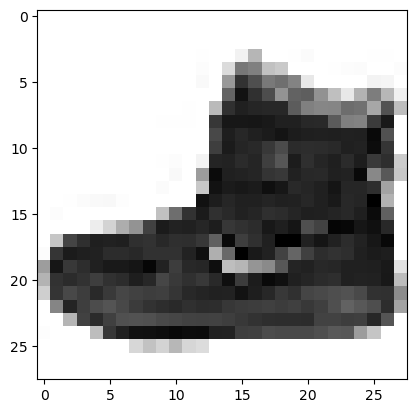

In [31]:
X_train, y_train = fashion.data[:60000], targets[:60000]
X_test, y_test = fashion.data[60000:], targets[60000:]

import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(28,28), cmap="binary")

In [34]:
# you need to manually make labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# these correspond to ]
class_names[y_train[0]]

'Ankle boot'

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
# we want pixel intensities on 0-1 rather than a normal distribution

mlpClf = MLPClassifier(hidden_layer_sizes=[300,100], verbose=True, early_stopping=True, random_state=42)
pipeline = make_pipeline(MinMaxScaler(), mlpClf)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

Iteration 1, loss = 0.55394420
Validation score: 0.854833
Iteration 2, loss = 0.39017365
Validation score: 0.867500
Iteration 3, loss = 0.34572472
Validation score: 0.877500
Iteration 4, loss = 0.31541926
Validation score: 0.881167
Iteration 5, loss = 0.29351007
Validation score: 0.887167
Iteration 6, loss = 0.28459028
Validation score: 0.889167
Iteration 7, loss = 0.26775210
Validation score: 0.885500
Iteration 8, loss = 0.25610516
Validation score: 0.886667
Iteration 9, loss = 0.24488907
Validation score: 0.893167
Iteration 10, loss = 0.23915583
Validation score: 0.888500
Iteration 11, loss = 0.22290961
Validation score: 0.897167
Iteration 12, loss = 0.21925185
Validation score: 0.889667
Iteration 13, loss = 0.21249406
Validation score: 0.892167
Iteration 14, loss = 0.20374069
Validation score: 0.891333
Iteration 15, loss = 0.19557455
Validation score: 0.893833
Iteration 16, loss = 0.19099949
Validation score: 0.893667
Iteration 17, loss = 0.18445775
Validation score: 0.890333
Iterat

0.8929

For this neural network, lets calculate the number of parameters.

- Inputs = 28x28 image = 784 (not params)
- Hidden layer 1 = 300 neurons > one weight for each neuron-neuron pair between layers and one bias term per hidden neuron > 300x784 + 300 = 235,500
- Hidden layer 2 = 100 neurons > 100x300+100 = 30,100
- Output = 10 neurons > 10 x 100 + 10 = 10,100

All these parameters got us about a 90% accuracy

In [ ]:
Xnew = X_test[:15]
pipeline.predict(Xnew) - y_test[:15] # only one error! at spot 12

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0])

In [43]:
# Predicting probabilities
(pipeline.predict_proba(Xnew))[12].round(2)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Our model is 100% confident it sees a sandal. Lets look at the real image:

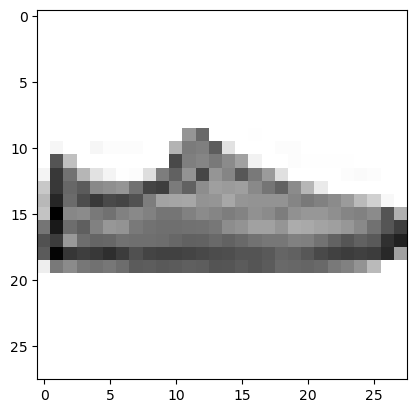

In [45]:
plt.imshow(X_test[12].reshape(28,28), cmap="binary")

Neural nets tend to be overconfident, especially as n epochs increase (overfitting).

You can help stop overconfidence by changing your target vectors from [0,0,1] to [.05, .05, .9] for example

## Hyperparameter Tuning

### Number of hidden layers

Deeper networks "learn" features quicker than shallow ones, even if the total number of neurons is the same.

You can also reuse low-level layers across similar problems to improve training speed, for example, recognizing faces > recognizing hairstyles. This technique is called transfer learning. This works because the low-level structures learned (this is a face, this is hair, this is background) are the same in the two models.

Complex tasks need more hidden layers, and you can basically just add more until you start massively overfitting the training set.

When training DNNs (deep neural nets) with lots of hidden layers, you tend to reuse lower layers from known good models and train the deeper layers.

### Number of Neurons Per Hidden Layer

Usually you go with the same number of neurons per layer, with only the first hidden layer having a bigger number, depending on the dataset.

Same n neurons makes hyperparam tuning easier. You can increase the number of neurons gradually until overfitting, or use more neurons than necessary and have the network stop early.

Using more neurons than necessary is usually a better approach so you make sure you can model complex relationships. If you PCA the mnist dataset youll find you need 187 dimensions for 95% of the variance. So 200 layers wont be a bottleneck.

Bottleneck layers arent a bad thing, as they can force the network to become more information-efficient, but as always you have to tune the model to find out.

### Learning Rate

The optimal learning rate is half the max learning rate (max = where training diverges)

Good way to find learning rate is to train a few hundred iterations with learning rates from $10^{-5}$ to 10, each step multiply the learning rate by $(10/10^{-5})^{1/500}$, plot loss by log learning rate, and you can find the optimal learning rate where the loss hits a minimum.

In order to change the learning rate during training, you need to set warm_start=true, and fit the model one batch at a time with .partial_fit()

### Batch Size

Large batch sizes = gpus can process them efficiently = more instances/second for your algo

Recommended to use the biggest batch size that fits in your VRAM, but large batch sizes = more training instability, and might not generalize as well.

Yann LeCun tweeted about using batch sizes <= 32

Recent research shows you can use large batches if you warm up the learning rate to get short training times without a huge generalization gap.

### Other Hyperparameters

- *Optimizer*: there are different choices than mini-batch gradient descent, can speed up and improve performance
- *Activation function*: ReLU is the usual good default, but you can mess around and see if others work better